In [1]:
import pandas as pd
import sklearn.model_selection as ms
import sklearn.linear_model as lm
import matplotlib.pyplot as plt

In [2]:
print('Versão do pandas:', pd.__version__)

Versão do pandas: 2.2.0


In [3]:
#Criar dataframe para abrir. csv(dataset)
vendas = pd.read_csv("ClientesDB.csv")

In [4]:
vendas

,ClientID,SaleDate,ProductID,Prod_Price
0,63,16/05/2023,44,247.65
1,62,20/04/2023,52,268.12
2,59,03/05/2023,1,918.50
3,12,02/04/2024,74,466.29
4,18,07/03/2024,64,468.14
...,...,...,...,...
5195,88,21/06/2023,144,120.30
5196,30,15/08/2023,155,980.43
5197,99,12/05/2023,32,553.77
5198,16,29/02/2024,144,245.59


In [5]:
#Caso os dados tenham NaN, limpar o dataset
vendas_limpo = vendas.dropna()

In [9]:
vendas_limpo.head()

,ClientID,SaleDate,ProductID,Prod_Price
0,63,16/05/2023,44,247.65
1,62,20/04/2023,52,268.12
2,59,03/05/2023,1,918.50
3,12,02/04/2024,74,466.29
4,18,07/03/2024,64,468.14


In [10]:
vendas_limpo

,ClientID,SaleDate,ProductID,Prod_Price
0,63,16/05/2023,44,247.65
1,62,20/04/2023,52,268.12
2,59,03/05/2023,1,918.50
3,12,02/04/2024,74,466.29
4,18,07/03/2024,64,468.14
...,...,...,...,...
5195,88,21/06/2023,144,120.30
5196,30,15/08/2023,155,980.43
5197,99,12/05/2023,32,553.77
5198,16,29/02/2024,144,245.59


In [11]:
#Pegando nossa varialvel X, em nosso caso o id do cliente
#variavel = dataset.iloc[linha,coluna]
x = vendas_limpo.iloc[:, 0]

In [12]:
x

0        63
1        62
2        59
3        12
4        18
       ... 
5195     88
5196     30
5197     99
5198     16
5199    156
Name: ClientID, Length: 5200, dtype: int64

In [13]:
#Mostrar a forma de x
x.shape

(5200,)

In [14]:
#Pegando nossa variavel Y, em nosso caso valor do carro
y = vendas_limpo.iloc[:,3]

In [15]:
y

0       247.65
1       268.12
2       918.50
3       466.29
4       468.14
         ...  
5195    120.30
5196    980.43
5197    553.77
5198    245.59
5199    248.38
Name: Prod_Price, Length: 5200, dtype: float64

In [16]:
#Mostrar a forma de y
y.shape

(5200,)

In [19]:
#Separar dados de treino e teste
#No ms.train_test_split a porcentagem padrão de teste e 20%
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size = 0.2)

In [20]:
x_train.shape

(4160,)

In [21]:
x_train

1991    144
2519     63
3333     65
2385     78
86       48
       ... 
4988     46
3801     99
146      62
3477     45
104       1
Name: ClientID, Length: 4160, dtype: int64

In [22]:
x_test.shape

(1040,)

In [23]:
y_train.shape

(4160,)

In [25]:
#Tranformação da dimensão de 1D para 2D
x_tr = x_train.values.reshape(-1, 1)
y_tr = y_train.values.reshape(-1, 1)

In [27]:
x_tr.shape

(4160, 1)

In [29]:
y_tr.shape

(4160, 1)

In [30]:
#Treinando o modelo
linear_simples = lm.LinearRegression()
linear_simples.fit(x_tr, y_tr)

LinearRegression()

In [32]:
#Tranformação da dimensão de 1D para 2D
x_te = x_test.values.reshape(-1, 1)
y_te = y_test.values.reshape(-1, 1)

In [33]:
#Previsão 
y_pred = linear_simples.predict(x_te)

<function matplotlib.pyplot.show(close=None, block=None)>

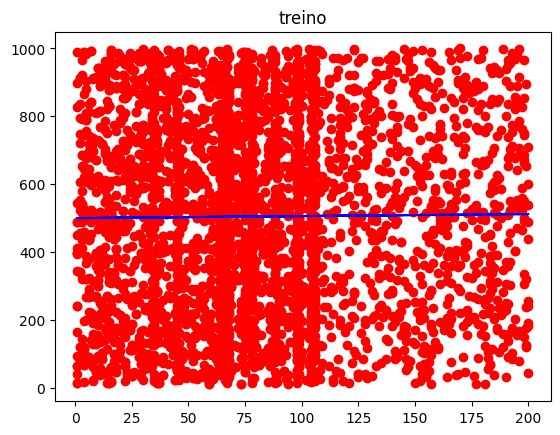

In [34]:
#Visualizando o treino 
plt.scatter(x_tr, y_tr, color = 'red')
plt.plot(x_tr, linear_simples.predict(x_tr), color = 'blue', scaley=False)
plt.title('treino')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

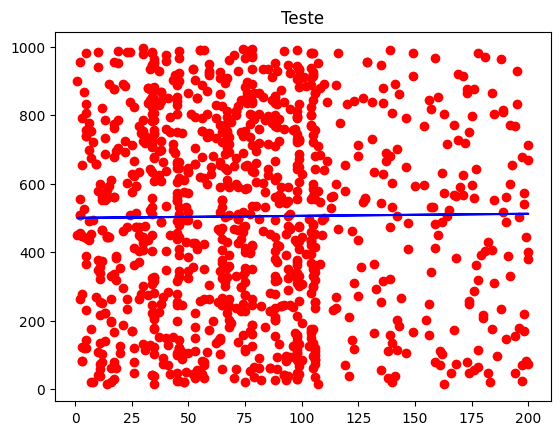

In [36]:
#Visualizando o teste 
plt.scatter(x_te, y_te, color = 'red')
plt.plot(x_te, linear_simples.predict(x_te), color = 'blue', scaley=False)
plt.title('Teste')
plt.show

In [37]:

print(linear_simples.predict([[65]]))

[[504.15562948]]
